<a href="https://colab.research.google.com/github/SmartNandini/Music_Genre/blob/main/LSTM_OurOwn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LSTM

In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [2]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import keras
import matplotlib.pyplot as plt
import random
import librosa
import math

In [3]:
def load_data(data_path):

    with open(data_path, "r") as f:
        data = json.load(f)

    # convert lists to numpy arrays
    X = np.array(data["mfcc"])
    y = np.array(data["labels"])
    mapping = data["mapping"]

    print("Data succesfully loaded!")

    return  X, y, mapping

In [4]:
# path to json
DATA_PATH = "/content/gdrive/MyDrive/Program_Datasets/ourdata.json"

# load data
X, y, mapping = load_data(DATA_PATH)

Data succesfully loaded!


In [5]:
X.shape

(9000, 517, 13)

In [6]:
y.shape

(9000,)

In [7]:
mapping

['Jazz',
 'Rock',
 'Blues',
 'Classical',
 'Reggae',
 'Country',
 'Disco',
 'Hip-Hop',
 'Metal',
 'Pop']

In [8]:
def plot_history(history):

    fig, axs = plt.subplots(2)

    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()

In [11]:
# create train, validation and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 10)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2)

# add an axis to input sets
X_train = X_train[..., np.newaxis]
X_validation = X_validation[..., np.newaxis]
X_test = X_test[..., np.newaxis]


X_train.shape

(5040, 517, 13, 1)

In [10]:
input_shape = (X_train.shape[1], X_train.shape[2])

model = keras.Sequential()
model.add(keras.layers.LSTM(64, input_shape=input_shape, return_sequences = True))
model.add(keras.layers.LSTM(128))
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dropout(0.2))


# output layer
model.add(keras.layers.Dense(12, activation='softmax'))

# compile model
opt = keras.optimizers.Adam(learning_rate=0.001)
opt1 = keras.optimizers.RMSprop()
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 517, 64)           19968     
                                                                 
 lstm_1 (LSTM)               (None, 128)               98816     
                                                                 
 dense (Dense)               (None, 32)                4128      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 12)                3

In [12]:
# train model
history = model.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=32, epochs=50)

Epoch 1/50
158/158 [==============================] - 212s 1s/step - loss: 2.1268 - accuracy: 0.2440 - val_loss: 1.8228 - val_accuracy: 0.3770
Epoch 2/50
158/158 [==============================] - 206s 1s/step - loss: 1.7843 - accuracy: 0.3831 - val_loss: 1.7240 - val_accuracy: 0.3929
Epoch 3/50
158/158 [==============================] - 207s 1s/step - loss: 1.7121 - accuracy: 0.4125 - val_loss: 1.6012 - val_accuracy: 0.4381
Epoch 4/50
158/158 [==============================] - 209s 1s/step - loss: 1.6133 - accuracy: 0.4470 - val_loss: 1.5372 - val_accuracy: 0.4627
Epoch 5/50
158/158 [==============================] - 208s 1s/step - loss: 1.5390 - accuracy: 0.4738 - val_loss: 1.4708 - val_accuracy: 0.4786
Epoch 6/50
158/158 [==============================] - 206s 1s/step - loss: 1.4939 - accuracy: 0.4964 - val_loss: 1.3951 - val_accuracy: 0.5063
Epoch 7/50
158/158 [==============================] - 207s 1s/step - loss: 1.4421 - accuracy: 0.5046 - val_loss: 1.4295 - val_accuracy: 0.5159

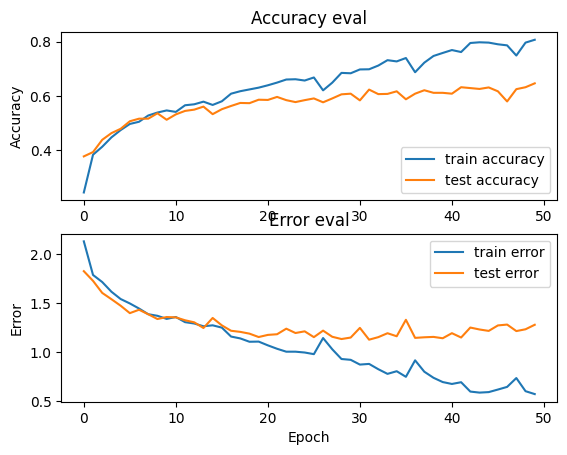

In [13]:
# plot accuracy and error as a function of the epochs
plot_history(history)

In [14]:
# evaluate model on Test Set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

85/85 - 34s - loss: 1.2768 - accuracy: 0.6489 - 34s/epoch - 398ms/step

Test accuracy: 0.648888885974884


In [15]:
model.save("/content/gdrive/MyDrive/Program_Datasets/LSTM_ourdata2.h5")

In [16]:
model = keras.models.load_model("/content/gdrive/MyDrive/Program_Datasets/LSTM_ourdata2.h5")

In [17]:
score = model.evaluate(X_test, y_test, verbose = 0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.276842713356018
Test accuracy: 0.648888885974884


In [18]:
score

[1.276842713356018, 0.648888885974884]

In [19]:
y_pred = []

for a in X_test:

  x_to_test = a[np.newaxis, ...]
  prediction = model.predict(x_to_test, verbose = 0)

  # get index with max value
  predicted_index = np.argmax(prediction, axis=1)
  y_hat = int(predicted_index)
  y_pred.append(y_hat)
  print(a)

Streaming output truncated to the last 5000 lines.
  [ -12.95271492]
  [ -11.32565498]]]
[[[-424.09963989]
  [ 142.86419678]
  [  35.73082733]
  ...
  [  -9.3675251 ]
  [  -3.24170589]
  [  -2.7940917 ]]

 [[-416.46636963]
  [ 150.47238159]
  [  38.43557739]
  ...
  [  -4.23317385]
  [  -2.80817771]
  [  -5.71081924]]

 [[-421.57830811]
  [ 144.92456055]
  [  36.61466217]
  ...
  [  -1.77986073]
  [  -1.92553818]
  [  -5.49429798]]

 ...

 [[-323.12322998]
  [ 181.65336609]
  [   9.34356213]
  ...
  [  -5.47687435]
  [   5.26031208]
  [   0.61304617]]

 [[-281.87646484]
  [ 146.63969421]
  [  -0.62506104]
  ...
  [  -7.11539459]
  [   9.16458607]
  [  13.85584641]]

 [[-277.01580811]
  [ 134.99331665]
  [  -5.08550835]
  ...
  [  -6.02331305]
  [  11.9743824 ]
  [  13.68442154]]]
[[[-209.55073547]
  [ 195.25915527]
  [ -30.23568726]
  ...
  [   1.91668999]
  [   8.26501369]
  [  -2.94488335]]

 [[-186.06767273]
  [ 203.48696899]
  [ -32.96864319]
  ...
  [   2.46194911]
  [   8.8693609

In [20]:
temp = np.array(y_pred)

In [21]:
y_pred = temp

In [22]:
keras.metrics.categorical_accuracy(y_test, y_pred)

<tf.Tensor: shape=(), dtype=float32, numpy=1.0>

In [23]:
import sklearn

In [24]:
correct = 0
for a, b in zip(y_test, y_pred):
  if a==b:
    correct += 1

In [25]:
correct

1752

In [26]:
len(y_test)

2700

In [27]:
correct/len(y_test)

0.6488888888888888

In [28]:
sklearn.metrics.accuracy_score(y_test, y_pred)

0.6488888888888888

In [29]:
sklearn.metrics.precision_score(y_test, y_pred, average=None)

array([0.71661238, 0.38955823, 0.51419558, 0.86868687, 0.78787879,
       0.525     , 0.72363636, 0.74369748, 0.64983165, 0.51388889])

In [30]:
sklearn.metrics.recall_score(y_test, y_pred, average=None)

array([0.79136691, 0.34642857, 0.65991903, 0.90526316, 0.75912409,
       0.44055944, 0.69824561, 0.77631579, 0.72556391, 0.4095941 ])

In [31]:
sklearn.metrics.f1_score(y_test, y_pred, average=None)

array([0.75213675, 0.36672968, 0.57801418, 0.88659794, 0.7732342 ,
       0.47908745, 0.71071429, 0.75965665, 0.68561279, 0.45585216])

In [32]:
sklearn.metrics.jaccard_score(y_test, y_pred, average = 'weighted')

0.4948408880388265

In [33]:
sklearn.metrics.recall_score(y_test, y_pred, average = 'macro')

0.6512380601513059

In [34]:
mapping

['Jazz',
 'Rock',
 'Blues',
 'Classical',
 'Reggae',
 'Country',
 'Disco',
 'Hip-Hop',
 'Metal',
 'Pop']

In [35]:
genres = ['Jazz', 'Rock', 'Blues', 'Classical', 'Reggae', 'Country', 'Disco', 'Hiphop', 'Metal', 'Pop']

acc_score = sklearn.metrics.accuracy_score(y_test, y_pred)
j_score = sklearn.metrics.jaccard_score(y_test, y_pred, average = 'weighted')
j_classes = sklearn.metrics.jaccard_score(y_test, y_pred, average = None)
f1 = sklearn.metrics.f1_score(y_test, y_pred, average='weighted')
f1_classes = sklearn.metrics.f1_score(y_test, y_pred, average=None)
precision = sklearn.metrics.precision_score(y_test, y_pred, average='weighted')
precision_classes = sklearn.metrics.precision_score(y_test, y_pred, average=None)
recall = sklearn.metrics.recall_score(y_test, y_pred, average='weighted')
recall_classes = sklearn.metrics.recall_score(y_test, y_pred, average=None)

In [36]:
print("Model Accuracy Metric: -")

print(f"Total Accuracy Score              :  {acc_score}" )
print(f"Weighted Average Jaccard Score    :  {j_score}" )
print(f"Weighted Average F1 Score         :  {f1}" )
print(f"Weighted Average Precision Score  :  {precision}" )
print(f"Weighted Average Recall Score     :  {recall}" )

Model Accuracy Metric: -
Total Accuracy Score              :  0.6488888888888888
Weighted Average Jaccard Score    :  0.4948408880388265
Weighted Average F1 Score         :  0.6436213517315794
Weighted Average Precision Score  :  0.6432681101691092
Weighted Average Recall Score     :  0.6488888888888888


In [37]:
j_classes

array([0.60273973, 0.22453704, 0.40648379, 0.7962963 , 0.63030303,
       0.315     , 0.55124654, 0.61245675, 0.52162162, 0.29521277])

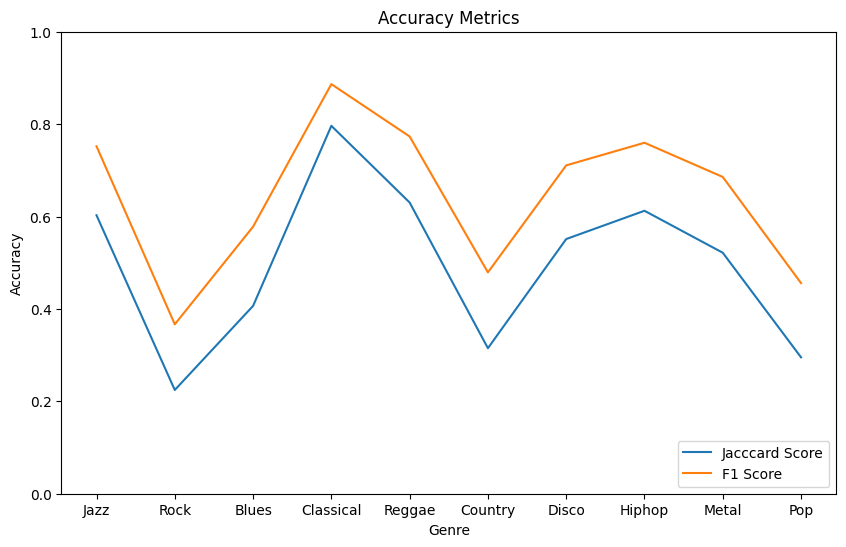

In [38]:
plt.figure(figsize=(10,6))
plt.plot(genres, j_classes, label="Jacccard Score")
plt.plot(genres, f1_classes, label="F1 Score")

plt.ylim(0, 1)
plt.xlabel("Genre")
plt.ylabel("Accuracy")
plt.title('Accuracy Metrics')
plt.legend(loc="lower right")
plt.show()

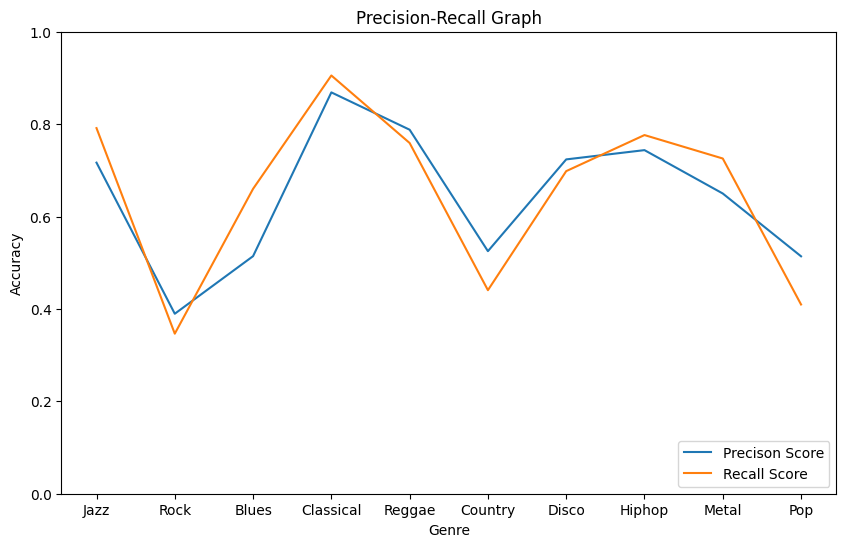

In [39]:
plt.figure(figsize=(10,6))
plt.plot(genres, precision_classes, label="Precison Score")
plt.plot(genres, recall_classes, label="Recall Score")

plt.ylim(0, 1)
plt.xlabel("Genre")
plt.ylabel("Accuracy")
plt.title('Precision-Recall Graph')
plt.legend(loc="lower right")
plt.show()